In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

**Load dataset**

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')

**1. Exploratory Data Analysis**

In [3]:
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


In [5]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [6]:
# checking for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


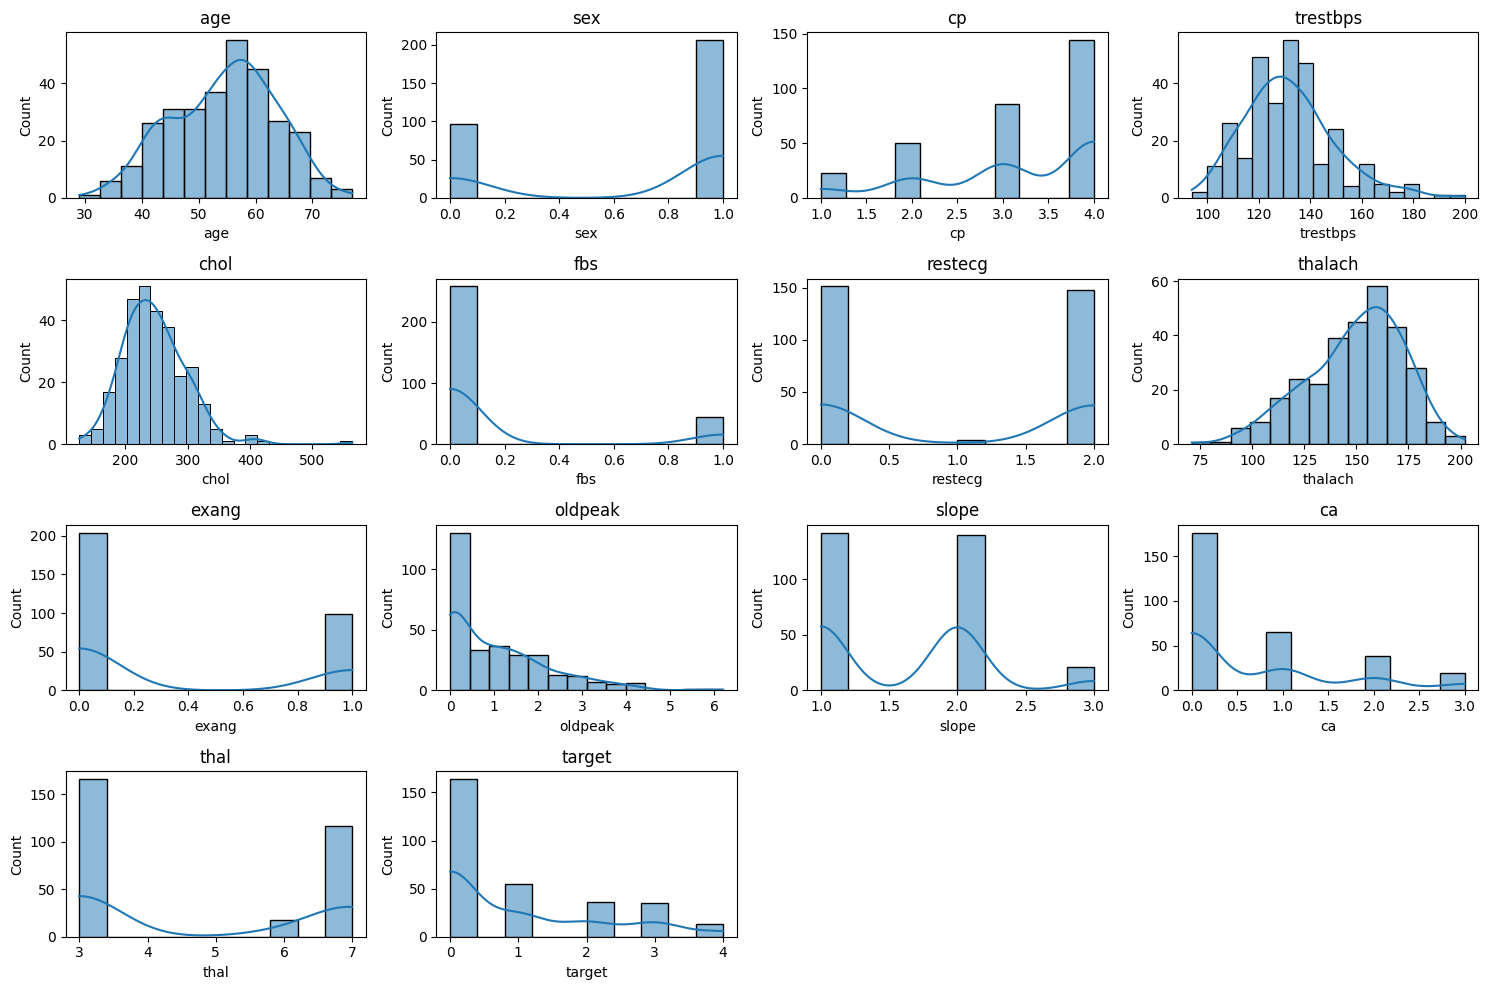

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

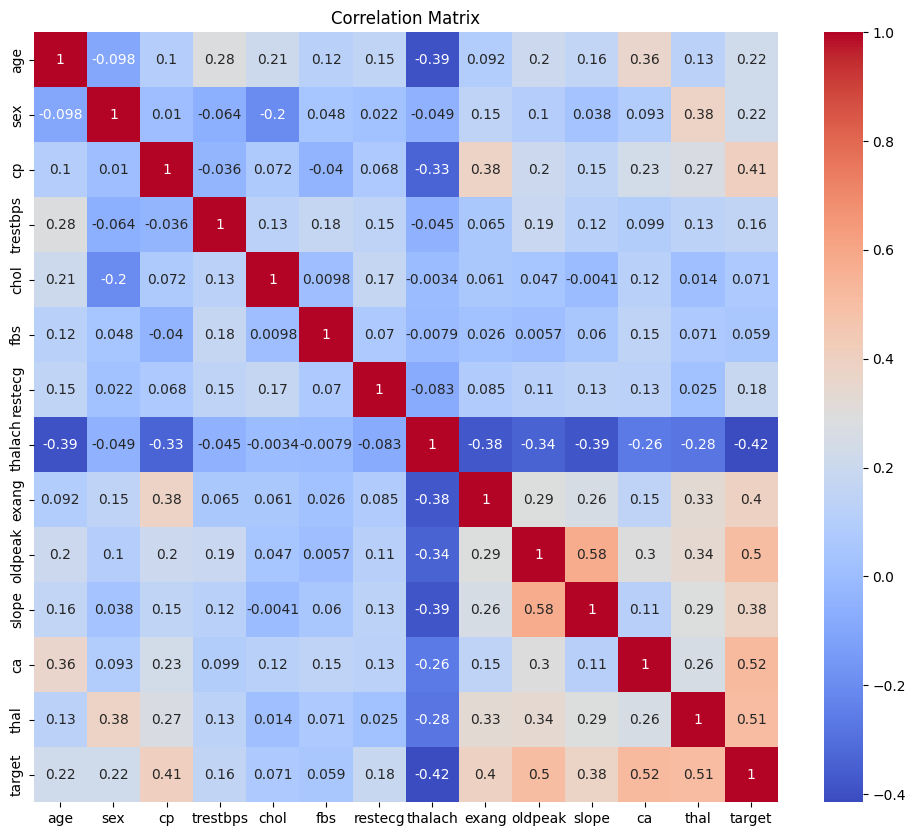

In [8]:
# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**2. Data Preprocessing**

In [9]:
# handling missing values
# # use median imputation since 'ca'is an integer feature
# data['ca'] = data['ca'].fillna(data['ca'].median())

# # use mode imputation since 'thal' is a categorical feature
# data['thal'] = data['thal'].fillna(data['thal'].mode()[0])


# drop missing values
data = data.dropna()

In [10]:
# encoding categorical features
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [11]:
# scaling numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

**3. Clustering**

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data.drop('target', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


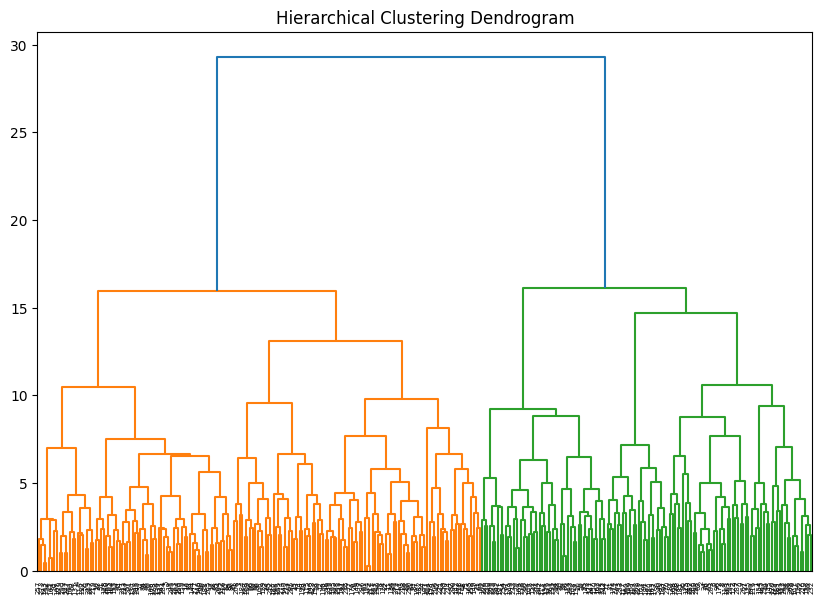

In [13]:
# hierarchical clustering
linkage_matrix = linkage(data.drop('target', axis=1), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [14]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data.drop('target', axis=1))

**4. Dimensionality Reduction and Visualization**

In [15]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop('target', axis=1))

In [16]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data.drop('target', axis=1))

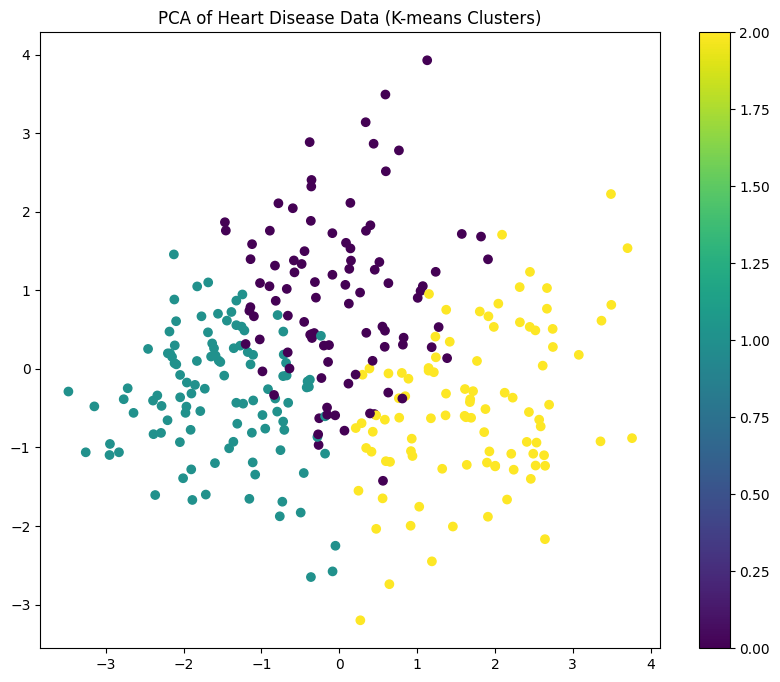

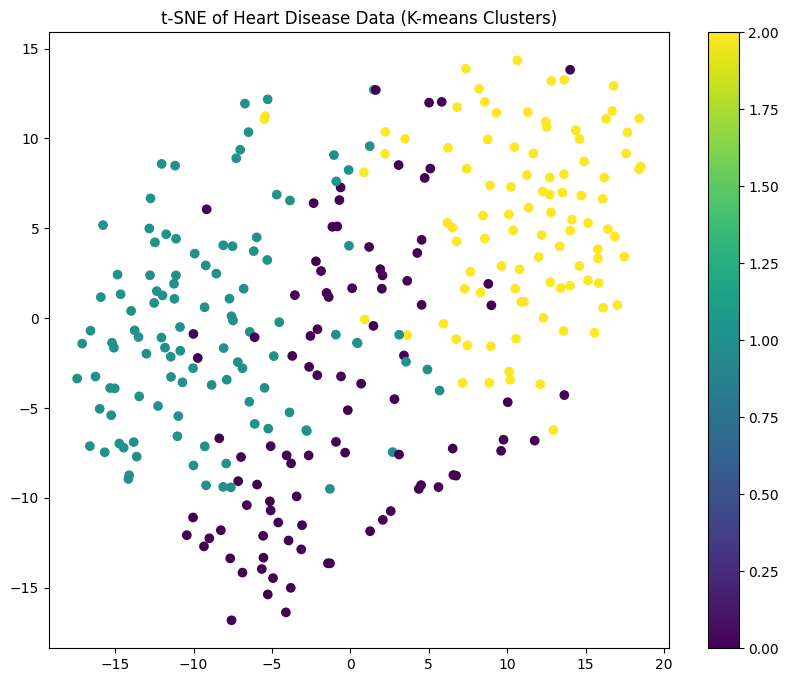

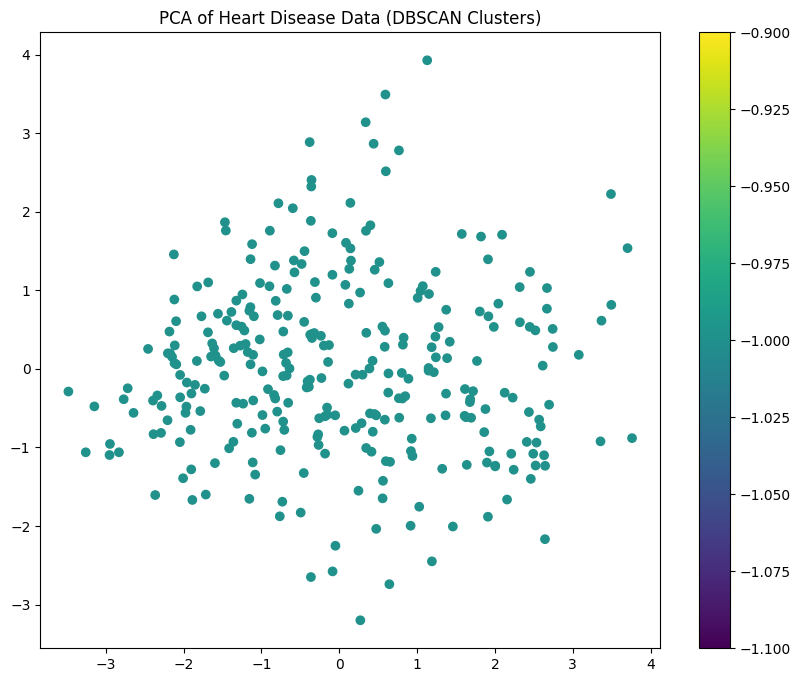

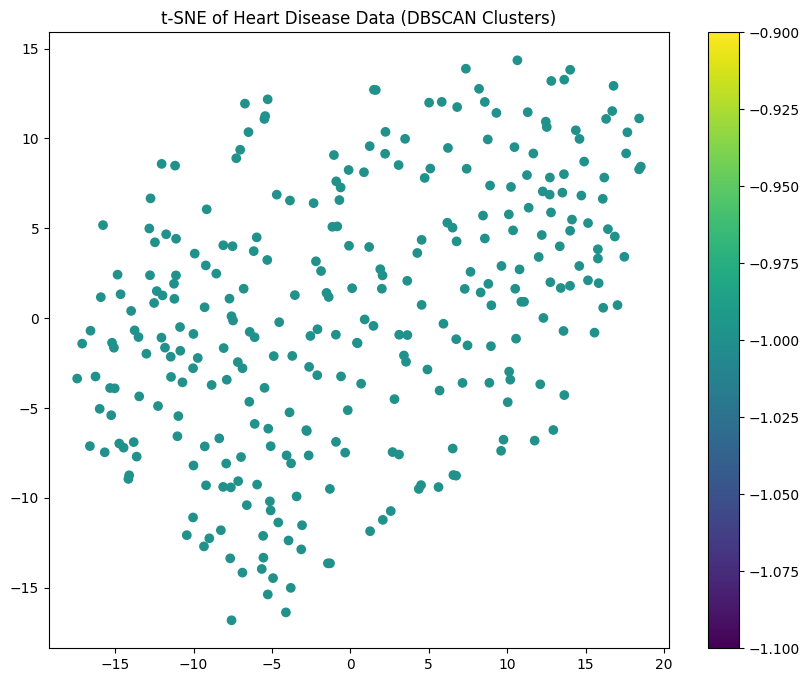

In [17]:
#  plot clusters
def plot_clusters(x, y, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# K-means clusters
plot_clusters(pca_result[:, 0], pca_result[:, 1], kmeans_labels, 'PCA of Heart Disease Data (K-means Clusters)')
plot_clusters(tsne_result[:, 0], tsne_result[:, 1], kmeans_labels, 't-SNE of Heart Disease Data (K-means Clusters)')

# DBSCAN clusters
plot_clusters(pca_result[:, 0], pca_result[:, 1], dbscan_labels, 'PCA of Heart Disease Data (DBSCAN Clusters)')
plot_clusters(tsne_result[:, 0], tsne_result[:, 1], dbscan_labels, 't-SNE of Heart Disease Data (DBSCAN Clusters)')

In [18]:
# print explained variance ratio for PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)

# analyze feature importance in PCA
feature_names = data.drop('target', axis=1).columns
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(2)],
    index=feature_names
)
print("\nPCA Components:")
print(pca_components)

# find the most important features for each principal component
for i, pc in enumerate(pca_components.columns):
    print(f"\nTop 5 features for {pc}:")
    print(pca_components[pc].abs().sort_values(ascending=False).head())

Explained variance ratio: [0.25694    0.13287371]

PCA Components:
                  PC1       PC2
age          0.422959  0.328784
trestbps     0.243366  0.461214
chol         0.148064  0.607528
thalach     -0.455097  0.293204
oldpeak      0.432775 -0.241751
ca           0.401557  0.030202
sex_0.0     -0.026351  0.161312
sex_1.0      0.026351 -0.161312
cp_1.0       0.001056  0.013523
cp_2.0      -0.085369  0.040700
cp_3.0      -0.067171  0.048565
cp_4.0       0.151485 -0.102788
fbs_0.0     -0.028043 -0.048256
fbs_1.0      0.028043  0.048256
restecg_0.0 -0.085134 -0.089017
restecg_1.0  0.010668 -0.000590
restecg_2.0  0.074465  0.089606
exang_0.0   -0.136096  0.111312
exang_1.0    0.136096 -0.111312
slope_1.0   -0.178080  0.128390
slope_2.0    0.150731 -0.106991
slope_3.0    0.027349 -0.021399
thal_3.0    -0.154776  0.120699
thal_6.0     0.024827 -0.026226
thal_7.0     0.129949 -0.094473

Top 5 features for PC1:
thalach     0.455097
oldpeak     0.432775
age         0.422959
ca          0

**5. Gaussian Mixture Models**

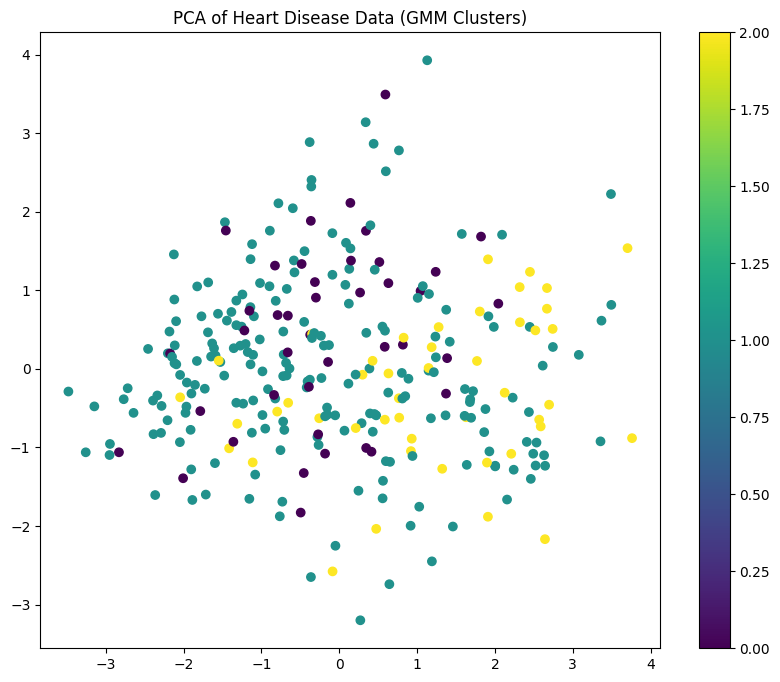


Top features for Component 1:
exang_0.0: 0.829 ± 0.376
sex_1.0: 0.756 ± 0.429
thal_3.0: 0.659 ± 0.474
slope_1.0: 0.585 ± 0.493
restecg_2.0: 0.561 ± 0.496

Top features for Component 2:
fbs_0.0: 1.000 ± 0.001
exang_0.0: 0.686 ± 0.464
sex_1.0: 0.643 ± 0.479
thal_3.0: 0.600 ± 0.490
restecg_0.0: 0.524 ± 0.499

Top features for Component 3:
sex_1.0: 0.761 ± 0.427
cp_4.0: 0.739 ± 0.439
fbs_0.0: 0.565 ± 0.496
exang_1.0: 0.522 ± 0.500
restecg_2.0: 0.500 ± 0.500

Component 1:
Number of samples: 41
Proportion with heart disease: 0.41

Component 2:
Number of samples: 210
Proportion with heart disease: 0.87

Component 3:
Number of samples: 46
Proportion with heart disease: 1.76


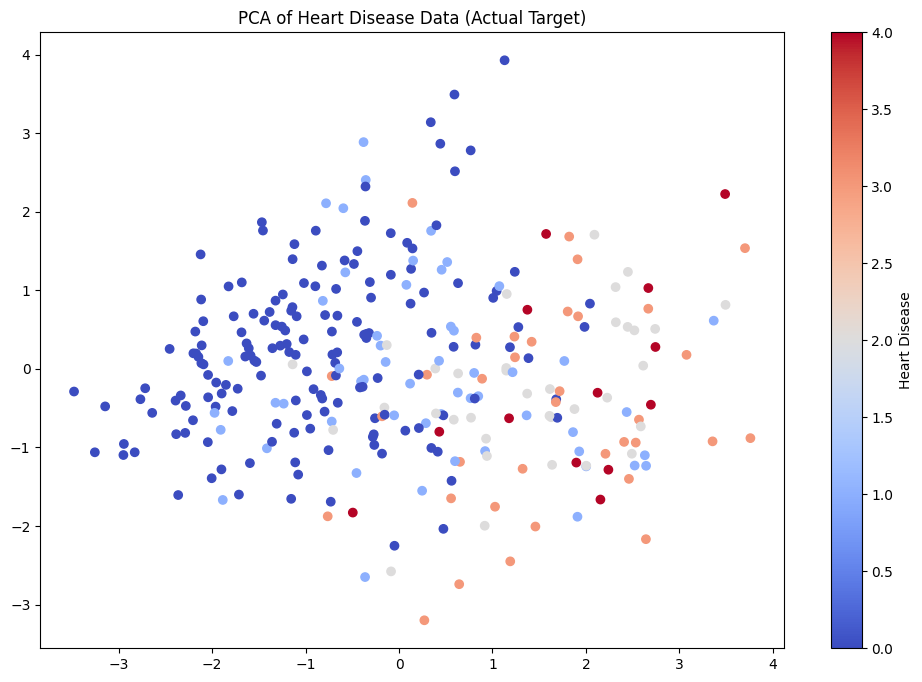

In [19]:
X = data.drop('target', axis=1)
feature_names = X.columns

# fit GMM and get cluster labels
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(X)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap='viridis')
plt.title('PCA of Heart Disease Data (GMM Clusters)')
plt.colorbar(scatter)
plt.show()

# means and covariances of each Gaussian component
means = gmm.means_
covariances = gmm.covariances_

# top features for each component
def get_top_features(means, covariances, feature_names, n_top=5):
    for i in range(means.shape[0]):
        print(f"\nTop features for Component {i+1}:")
        # Calculate feature importance as mean / standard deviation
        importance = np.abs(means[i]) / np.sqrt(np.diag(covariances[i]))
        top_idx = importance.argsort()[-n_top:][::-1]
        for idx in top_idx:
            print(f"{feature_names[idx]}: {means[i][idx]:.3f} ± {np.sqrt(covariances[i][idx, idx]):.3f}")

get_top_features(means, covariances, feature_names)

# analyze the relationship between components and the target variable
y = data['target']
for i in range(n_components):
    component_target = y[gmm_labels == i]
    print(f"\nComponent {i+1}:")
    print(f"Number of samples: {len(component_target)}")
    print(f"Proportion with heart disease: {component_target.mean():.2f}")


plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm')
plt.title('PCA of Heart Disease Data (Actual Target)')
plt.colorbar(scatter, label='Heart Disease')
plt.show()

**6. Clustering Evaluation**

In [20]:
# K-means evaluation
print("K-means Silhouette Score:", silhouette_score(data.drop('target', axis=1), kmeans_labels))
print("K-means Davies-Bouldin Index:", davies_bouldin_score(data.drop('target', axis=1), kmeans_labels))

K-means Silhouette Score: 0.12702721011372103
K-means Davies-Bouldin Index: 2.289394897760373


In [21]:
# DBSCAN evaluation
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(data.drop('target', axis=1), dbscan_labels))
    print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(data.drop('target', axis=1), dbscan_labels))
else:
    print("DBSCAN resulted in only one cluster or all noise points. Silhouette score and Davies-Bouldin index cannot be calculated.")


# additional information about DBSCAN results
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

DBSCAN resulted in only one cluster or all noise points. Silhouette score and Davies-Bouldin index cannot be calculated.
DBSCAN found 0 clusters and 297 noise points.


In [22]:
# GMM evaluation
print("GMM Silhouette Score:", silhouette_score(data.drop('target', axis=1), gmm_labels))
print("GMM Davies-Bouldin Index:", davies_bouldin_score(data.drop('target', axis=1), gmm_labels))

GMM Silhouette Score: 0.029172636648841448
GMM Davies-Bouldin Index: 3.985764064702217


**7. Comparison and Conclusion**

1. K-means performed the best among the three algorithms:

It has the highest Silhouette Score and the lowest Davies-Bouldin Index.
Although its performance is not excellent, it managed to find some structure in the data.


2. DBSCAN was unsuitable for this dataset:

It was unable to identify any clusters, suggesting that the heart disease data does not have clear density-based structures.
This could be due to the nature of the data or suboptimal parameter selection.


3. GMM performed poorly:

Its low Silhouette Score and high Davies-Bouldin Index suggest that the Gaussian components heavily overlap.
This indicates that the assumption of Gaussian-distributed clusters might not hold for this dataset.